In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import numpy as np
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Training settings
batch_size = 64

# MNIST Dataset
#train_dataset = datasets.MNIST(root='./mnist_data/',
#                               train=True,
#                               transform=transforms.ToTensor(),
#                               download=True)
#
#test_dataset = datasets.MNIST(root='./mnist_data/',
#                              train=False,
#                              transform=transforms.ToTensor())

#Load as panda
pd_train_dataset = pd.read_csv('./kaggle_data/train.csv')
pd_test_dataset = pd.read_csv('./kaggle_data/test.csv')


(28000, 785)


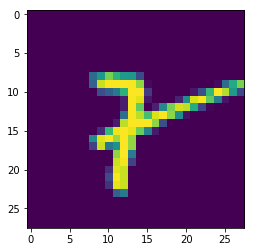

In [50]:
image = np.array(pd_test_dataset.iloc[128,:-1])
plt.imshow(image.reshape(28,28)) #displaying random image from the dataset
print (pd_test_dataset.shape)

In [27]:
class mnist_dataset_train(Dataset):
    """ train mnist dataset."""

    # Initialize your data, download, etc.
    def __init__(self):

        #Train data
        self.len = pd_train_dataset.shape[0]
        
        self.pt_x_data = torch.from_numpy(np.array(pd_train_dataset.iloc[:,1:].values, dtype='float')).float()
        self.y_data = np.array(pd_train_dataset.iloc[:, :1].values, dtype='float')
        self.pt_y_data = torch.from_numpy(self.y_data).long()
        
     
    def __getitem__(self, index):
        return self.pt_x_data[index], self.pt_y_data[index]

    def __len__(self):
        return self.len


train_dataset = mnist_dataset_train()

In [29]:
#quickly scale x data
#train_dataset.pt_x_data = train_dataset.pt_x_data/255

print (train_dataset.pt_y_data[0,:])
print (train_dataset.pt_y_data.shape)
print (train_dataset.pt_x_data[0,:])
print (train_dataset.pt_x_data.shape)

tensor([5])
torch.Size([60000, 1])
tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
     

In [28]:
# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=0)

#test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
#                                          batch_size=batch_size,
#                                          shuffle=False,
#                                          num_workers=0)

In [30]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(784, 520)
        self.l2 = nn.Linear(520, 320)
        self.l3 = nn.Linear(320, 240)
        self.l4 = nn.Linear(240, 120)
        self.l5 = nn.Linear(120, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Is this comment accurate???? might not need this step==>Flatten the data (n, 1, 28, 28)-> (n, 784)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)


model = Net()

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [32]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        
        #print (output.shape)
        #print (target.shape)
        
        target = target.squeeze_()
        #print (target.shape)
        
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

In [51]:
for epoch in range(1, 10):
    train(epoch)
    #test()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 1 [0/60000 (0%)]	Loss: 0.085304
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.001651
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.000785
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.001006
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.003237
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.006153
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.004174
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.008776
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.003109
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.006666
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.001457
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.011478
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.002732
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.001149
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.004350
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.000919
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.006727
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.007251
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.002653
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.018435
Train Epoch: 1 [12800/60000 (

Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.000052
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.001532
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.001425
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.000198
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.001513
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.000400
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.000490
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.000139
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.000251
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.000241
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.004926
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.000101
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.000323
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.030615
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.002991
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.000058
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.000115
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.000225
Train Epoch: 4 [42240/60000 (70%)]	Loss: 0.000667
Train Epoch: 4 [42880/60000 (71%)]	Loss: 0.000113


Train Epoch: 8 [640/60000 (1%)]	Loss: 0.000419
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.000260
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.000156
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.000128
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.001384
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.001197
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.000014
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.000021
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.000160
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.000243
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.000233
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.000228
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.001422
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.000047
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.000003
Train Epoch: 8 [10240/60000 (17%)]	Loss: 0.000019
Train Epoch: 8 [10880/60000 (18%)]	Loss: 0.000111
Train Epoch: 8 [11520/60000 (19%)]	Loss: 0.002065
Train Epoch: 8 [12160/60000 (20%)]	Loss: 0.001065
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.000618
Train Epoch: 8 [13440/60

In [34]:
#Test data
pt_x_data_test = torch.from_numpy(np.array(pd_test_dataset.iloc[:,:].values, dtype='float')).float()
#y_data_test = np.array(validation_set.loc[:, ['survived']].values, dtype='float')
#pt_y_data_test = torch.from_numpy(self.y_data_test).float()
print (pt_x_data_test.shape)

torch.Size([28000, 784])


In [52]:
#Run test set through
model.eval()
test_pred = model(pt_x_data_test)
#print (test_pred.shape)
#print (type(test_pred))
#print (test_pred[0,:])

pred = test_pred.data.max(1, keepdim=True)[1]
print (pred)

to_np = pred.detach().numpy()


#Add prediction col to test panda
#to_np = to_np.astype(int)
pd_test_dataset['Label'] = to_np


#Export to csv for submission

pd_test_dataset.index = np.arange(1, len(pd_test_dataset)+1)
pd_test_dataset.to_csv('NN_5_full.csv', columns = ['Label'], index = True, index_label = 'ImageId')

tensor([[2],
        [0],
        [9],
        ...,
        [3],
        [9],
        [2]])
